In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/CS 495 DataScience Capstone Project/

Mounted at /content/drive
/content/drive/My Drive/CS 495 DataScience Capstone Project


# Anime Synopsis Generator - LSTM Model

This Notebook builds and trains an LSTM-based text generation model to generate anime synopses from structured prompts. It uses a paired dataset of prompts and synopses prepared in advance.

**Goal:** Given a structured prompt (genre, theme, demographic), generate a human-like anime synopsis.


- **Input:** 'prompt_synopsis_train.csv'

- **Model:** LSTM

- **Output:** Trained model to generate synopses from prompts

# I. Import Libraries

In [ ]:
import os, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, TimeDistributed, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# II. Load & Clean Dataset

In [ ]:
train_df = pd.read_csv('prompt_synopsis_train.csv')
print("Train shape:", train_df.shape)

def clean_text(text):
  return text.lower().strip().replace('\n', ' ')

for col in ['prompt', 'synopsis']:
  train_df[col] = train_df[col].astype(str).apply(clean_text)

train_df["synopsis"] = "<start> " + train_df["synopsis"] + " <end>"

Train shape: (63278, 2)


# III. Tokenization & Padding

In [ ]:
vocab_size = 3000
pad_length = 150

tokenizer = Tokenizer(num_words = vocab_size, oov_token = "<OOV>")
tokenizer.fit_on_texts(train_df["prompt"].tolist() + train_df["synopsis"].tolist())

X = pad_sequences(tokenizer.texts_to_sequences(train_df["prompt"]), maxlen = pad_length, padding = "post")
Y = pad_sequences(tokenizer.texts_to_sequences(train_df["synopsis"]), maxlen = pad_length, padding = "post")
Y = np.expand_dims(Y, axis = -1)

# IV. Define & Compile LSTM Model

In [ ]:
model = Sequential([
    Embedding(input_dim = vocab_size, output_dim = 128),
    LSTM(128, return_sequences = True),
    TimeDistributed(Dense(vocab_size, activation = "softmax"))
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ ?                      │   0 (unbuilt) │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# V. Callbacks & Model Saving

In [ ]:
model_path = "lstm_model.keras"
tokenizer_path = "lstm_tokenizer.pkl"

checkpoint_cb = ModelCheckpoint(model_path, monitor = "val_loss", save_best_only = True)
earlystop_cb = EarlyStopping(monitor = "val_loss", patience = 2, restore_best_weights = True)

# VI. Train Model in Checkpointed Rounds

In [ ]:
history = model.fit(
    X, Y,
    initial_epoch = 22,
    epochs = 30,
    batch_size = 64,
    validation_split = 0.1,
    callbacks = [checkpoint_cb, earlystop_cb]
)

Epoch 23/30
890/890 ━━━━━━━━━━━━━━━━━━━━ 75s 72ms/step - accuracy: 0.4210 - loss: 4.1324 - val_accuracy: 0.4311 - val_loss: 3.7667
Epoch 24/30
890/890 ━━━━━━━━━━━━━━━━━━━━ 61s 69ms/step - accuracy: 0.4471 - loss: 3.6319 - val_accuracy: 0.4302 - val_loss: 3.7516
Epoch 25/30
890/890 ━━━━━━━━━━━━━━━━━━━━ 61s 68ms/step - accuracy: 0.4505 - loss: 3.6086 - val_accuracy: 0.4320 - val_loss: 3.7696
Epoch 26/30
890/890 ━━━━━━━━━━━━━━━━━━━━ 61s 68ms/step - accuracy: 0.4518 - loss: 3.5972 - val_accuracy: 0.4227 - val_loss: 3.7616


In [ ]:
history = model.fit(
    X, Y,
    initial_epoch = 26,
    epochs = 35,
    batch_size = 64,
    validation_split = 0.1,
    callbacks = [checkpoint_cb, earlystop_cb]
)

Epoch 27/35
890/890 ━━━━━━━━━━━━━━━━━━━━ 61s 69ms/step - accuracy: 0.4492 - loss: 3.6175 - val_accuracy: 0.4310 - val_loss: 3.7547
Epoch 28/35
890/890 ━━━━━━━━━━━━━━━━━━━━ 61s 68ms/step - accuracy: 0.4510 - loss: 3.5980 - val_accuracy: 0.4303 - val_loss: 3.7676
Epoch 29/35
890/890 ━━━━━━━━━━━━━━━━━━━━ 61s 68ms/step - accuracy: 0.4527 - loss: 3.5861 - val_accuracy: 0.4291 - val_loss: 3.7702


In [ ]:
history = model.fit(
    X, Y,
    initial_epoch = 29,
    epochs = 35,
    batch_size = 64,
    validation_split = 0.1,
    callbacks = [checkpoint_cb, earlystop_cb]
)

Epoch 30/35
890/890 ━━━━━━━━━━━━━━━━━━━━ 61s 69ms/step - accuracy: 0.4516 - loss: 3.5981 - val_accuracy: 0.4257 - val_loss: 3.7621
Epoch 31/35
890/890 ━━━━━━━━━━━━━━━━━━━━ 61s 69ms/step - accuracy: 0.4491 - loss: 3.6072 - val_accuracy: 0.4275 - val_loss: 3.7629
Epoch 32/35
890/890 ━━━━━━━━━━━━━━━━━━━━ 61s 69ms/step - accuracy: 0.4530 - loss: 3.5804 - val_accuracy: 0.4247 - val_loss: 3.7792


# VII. Save Tokenizer

In [ ]:
with open(tokenizer_path, "wb") as f:
  pickle.dump(tokenizer, f)

# VIII. Plot Training Loss

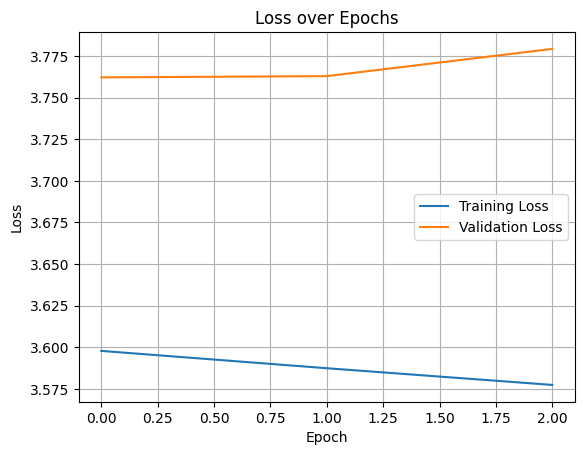

In [ ]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()